In [34]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from okl_fct import okl, lrokl, mse, predict
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(font_scale=1.5)

# Load dataset

In [30]:
X, y = load_svmlight_file('data/usps.libsvm')

In [15]:
#construct multi-class labels.
Y = np.zeros((len(y),len(np.unique(y))))
for i, y0 in enumerate(y):
    Y[i,int(y0-1)]=1

In [16]:
X

<9298x256 sparse matrix of type '<class 'numpy.float64'>'
	with 2301812 stored elements in Compressed Sparse Row format>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
K_train = rbf_kernel(X_train,gamma=None)
K_test = rbf_kernel(X_test,X_train,gamma=None)

In [38]:
np.save('digit_K_train', K_train)
np.save('digit_K_test', K_test)
np.save('digit_y_train', y_train)
np.save('digit_y_test', y_test)

# Train

In [100]:
p_list = np.array(range(10))+1
N = 20
lam_list = np.logspace(-5,0,N) * np.sqrt(LA.norm(np.dot(np.dot(y_train.T,K_train),y_train)))
lam_list = np.sort(lam_list)[::-1]

In [101]:
print(lam_list)

[  1.93702093e+03   1.05676013e+03   5.76525503e+02   3.14528952e+02
   1.71594251e+02   9.36148701e+01   5.10724797e+01   2.78630754e+01
   1.52009648e+01   8.29303045e+00   4.52434136e+00   2.46829731e+00
   1.34660299e+00   7.34652027e-01   4.00796376e-01   2.18658262e-01
   1.19291087e-01   6.50803833e-02   3.55052199e-02   1.93702093e-02]


In [102]:
model = okl(K_train,y_train,lam_list)

lambda = 1937.02092653
lambda = 1056.76012578
lambda = 576.525502715
lambda = 314.528952382
lambda = 171.594251114
lambda = 93.6148700858
lambda = 51.072479668
lambda = 27.8630753538
lambda = 15.2009648487
lambda = 8.29303044976
lambda = 4.52434136418
lambda = 2.46829731346
lambda = 1.34660299417
lambda = 0.73465202673
lambda = 0.4007963763
lambda = 0.218658261885
lambda = 0.11929108724
lambda = 0.0650803832987
lambda = 0.0355052199481
lambda = 0.0193702092653


In [70]:
import pickle
with open('digit_okl.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('digit_okl.pickle', 'rb') as handle:
#    b = pickle.load(handle)

# Test

In [115]:
OKL_acc = np.zeros((N,1))
OKL_time = np.zeros((N,1))
for k in range(N):
    OKL_time[k] = model[k]['time']
    pred_test = predict(K_test,model[k]['C'],model[k]['L'])
    pred_test_clf = np.zeros(pred_test.shape)
    for i in range(len(pred_test)):
        n = np.argmax(pred_test[i])
        pred_test_clf[i,n]=1
    OKL_acc[k] = accuracy_score(y_test,pred_test_clf)
jj = np.argmax(OKL_acc)
print('For OKL, when lambda = %.3f,\ntest accuracy reaches the maximum = %.3f' %(lam_list[jj],OKL_acc[jj]))

For OKL, when lambda = 0.065,
test accuracy reaches the maximum = 0.981


In [54]:
#model2 = {}
#for it,p in enumerate(p_list):
#    print('p = '+str(p))  
#    modelp = lrokl(K_train,y_train,lam_list,p)
#    model2[it] = modelp

#with open('digit_lrokl.pickle', 'wb') as handle:
#    pickle.dump(model2, handle, protocol=pickle.HIGHEST_PROTOCOL)
##with open('digit_okl.pickle', 'rb') as handle:
##    b = pickle.load(handle)

#P = len(p_list)
#LROKL_acc= np.zeros((P,N))
#LR_time = np.zeros((P,N))
#for k in range(N):
#    for j in range(P):
#        LR_time[j][k] = model2[j][k]['time']
#        pred_test = predict(K_test,model2[j][k]['A'],model2[j][k]['B'].T)
#        pred_test_clf = np.zeros(pred_test.shape)
#        for i in range(len(pred_test)):
#            n = np.argmax(pred_test[i])
#        pred_test_clf[i,n]=1
#        LROKL_acc[j][k] =accuracy_score(y_test,pred_test_clf)
#kk,hh = np.unravel_index(LROKL_acc.argmax(), LROKL_acc.shape)
#print('For low rank OKL, when p = %i, lambda = %.3f \ntest accuracy reaches the maximum = %.3f' %(p_list[kk],lam_list[hh],LROKL_acc[kk][hh]))

#p_list_2=[1,3,5,7,9]
#for i,p in enumerate(p_list_2):
#    plt.semilogx(lam_list, LR_time[p-1],label='p=%i'%p)
#plt.title('low rank OKL execution time')
#plt.grid(True)
#plt.xlabel("lambda")
#plt.ylabel("second")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.plot(p_list, LR_time[:,hh],label='Low rank OKL (lambda=%.3f)'%lam_list[hh])
#plt.title('Low rank OKL execution time')
#plt.grid(True)
#plt.xlabel("p")
#plt.ylabel("second")
#plt.legend(loc=0)

#plt.plot(p_list, LROKL_arr[:,hh],label='Low rank OKL (lambda=%.3f)'%lam_list[hh],color=c[0])
#plt.title('Low rank OKL : test accuracy in function of rank')
#plt.axvline(x=p_list[kk],color=c[0],linestyle='--')
#plt.grid(True)
#plt.xlabel("p")
#plt.ylabel("accuracy")
#plt.legend(loc=0)

# Plot

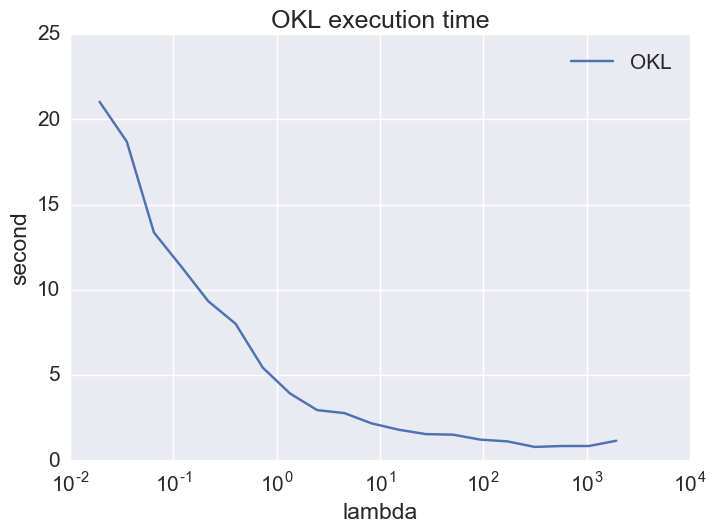

In [116]:
plt.semilogx(lam_list, OKL_time,label='OKL')
plt.title('OKL execution time')
plt.grid(True)
plt.xlabel("lambda")
plt.ylabel("second")
plt.legend(loc=0)

In [117]:
c=sns.color_palette()

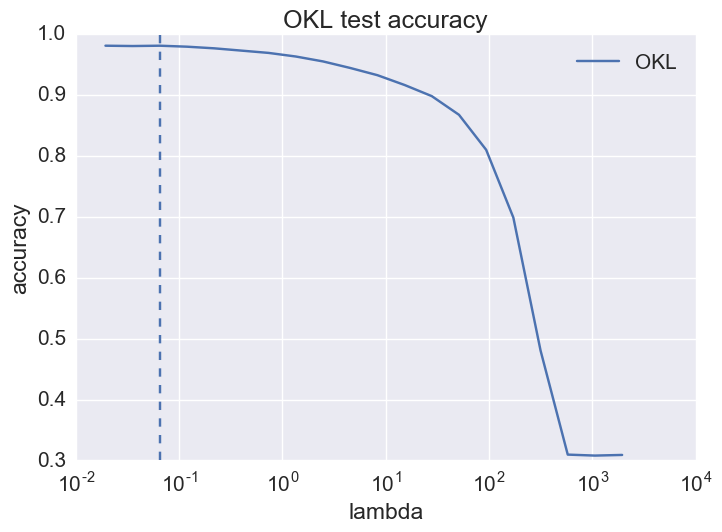

In [118]:
plt.semilogx(lam_list, OKL_acc,label='OKL',color=c[0])
#plt.semilogx(lam_list, LROKL_acc[kk],label='Low rank OKL (p=%i)'%p_list[kk],color=c[2])
plt.axvline(x=lam_list[jj],color=c[0],linestyle='--')
#plt.axvline(x=lam_list[hh],color=c[2],linestyle='--')
plt.title('OKL test accuracy')
plt.grid(True)
plt.xlabel("lambda")
plt.ylabel("accuracy")
plt.legend(loc=0)

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualize(ker, label, threshold=0.6):
    
    """
    L is the output kernel
    labels come form caltech_101_classes.txt
    """
    G = nx.Graph()
    
    #add nodes
    G.add_nodes_from(list(range(len(ker))))

    #add edges if similarity > 0.5
    for i in range(len(ker)):
        for j in range(i+1,len(ker)):
            if ker[i][j] > threshold:
                G.add_edges_from([(i,j,{'weight':ker[i][j]})])
    pos = nx.spring_layout(G)

    #draw the graph
    plt.figure(figsize=(20,20))
    nx.draw_networkx_nodes(G,pos,node_color='grey',
                          node_size=500,alpha=0.8)

    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
    nx.draw_networkx_labels(G,pos,label,font_size=16)
    plt.axis('off')
    plt.savefig('full.png')

    #show the figure
    plt.show()

In [120]:
ker 

array([[  4.13620341e+00,   1.90203099e-01,  -6.90488153e-01,
         -6.55779173e-01,  -8.51845216e-02,  -1.03886991e+00,
         -1.52507954e+00,  -2.01513119e-01,  -4.32991120e-01,
         -5.21726549e-03],
       [  1.90203099e-01,   2.47995259e+00,  -2.44704382e-01,
         -5.01261969e-02,  -5.27183184e-01,  -8.07568291e-02,
         -4.44379605e-01,  -2.81326973e-01,  -4.92884515e-01,
         -5.37366918e-01],
       [ -6.90488153e-01,  -2.44704382e-01,   7.17736524e+00,
         -1.29411629e+00,  -1.05776661e+00,  -4.27759293e-01,
         -1.18495676e+00,  -4.37893393e-01,  -1.33377393e+00,
         -1.55671697e-01],
       [ -6.55779173e-01,  -5.01261969e-02,  -1.29411629e+00,
          7.64643955e+00,  -1.10748298e-01,  -2.49252998e+00,
          1.55773051e-01,  -6.05042592e-01,  -1.66744855e+00,
         -7.71327107e-01],
       [ -8.51845216e-02,  -5.27183184e-01,  -1.05776661e+00,
         -1.10748298e-01,   8.05570921e+00,  -5.10914405e-01,
         -7.86357640e-01

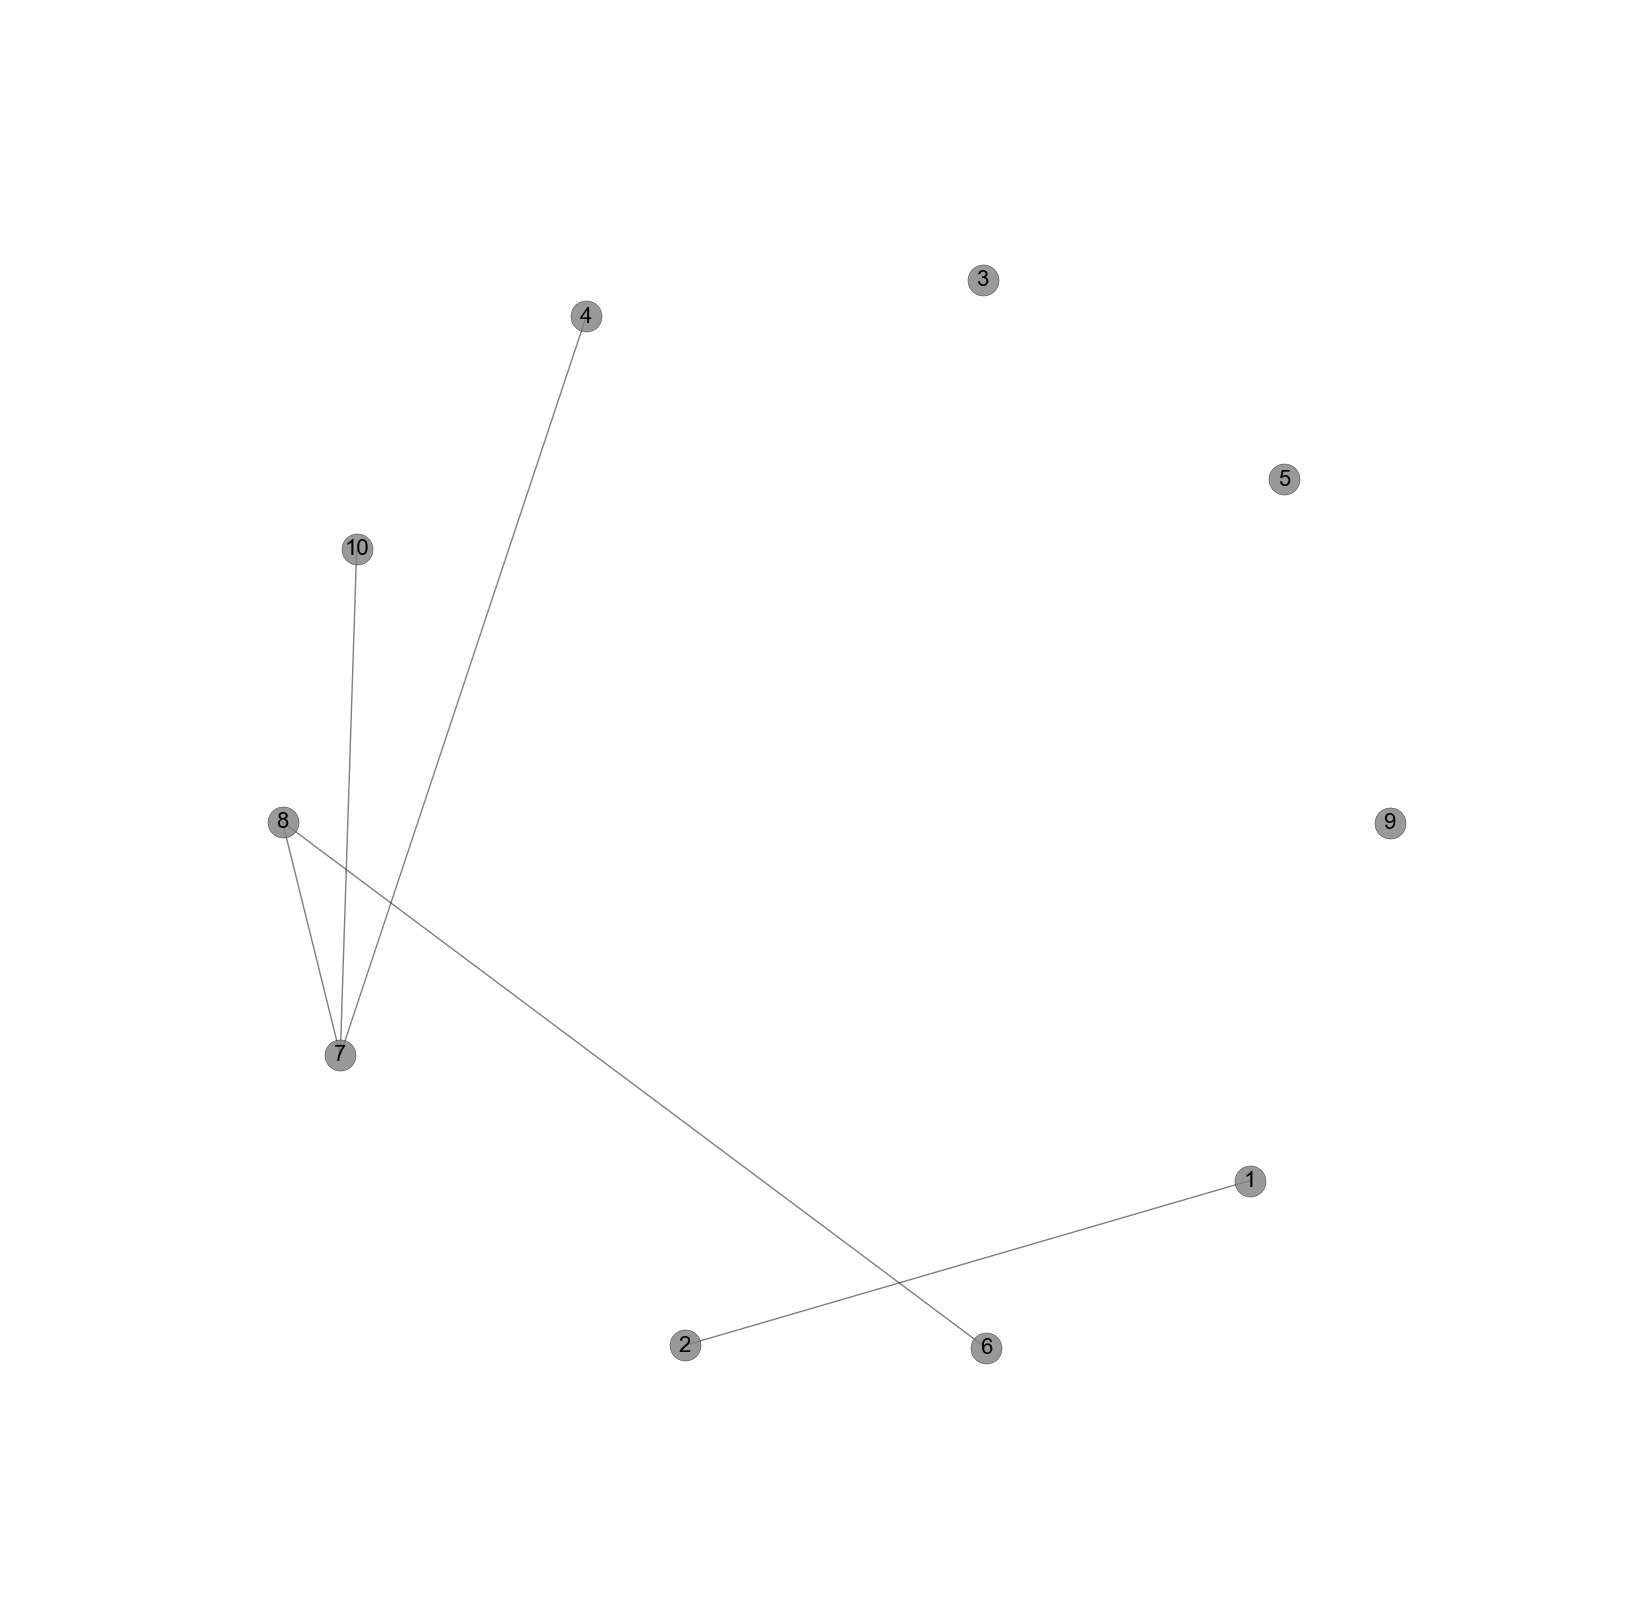

In [119]:
ker = model[jj]['L']
#ker2 = model2[kk][hh]['']
label = dict(zip(list(range(len(ker))),[1,2,3,4,5,6,7,8,9,10]))
visualize(ker, label, threshold=0)